# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I define most profitable item by subtracting State Bottle Cost from State Bottle Retail (Revenue - Cost of Goods Sold (COGS) = Profit). Therefore, whichever bottle has the highest total profit would be the most profitable. Arguably, most profitable could be calculated by volume of sales as well. However, with a bit of research, I found that this approach is less common.

,bottles_sold,avg_profit_per_unit,total_profit
Item Description,,,
TITOS HANDMADE VODKA,"57,263",$5.97,"$364,074"
BLACK VELVET,"76,184",$3.43,"$274,677"
FIREBALL CINNAMON WHISKEY,"97,308",$3.75,"$187,535"
CROWN ROYAL,"19,817",$8.31,"$160,982"
CROWN ROYAL REGAL APPLE,"16,250",$7.88,"$122,880"
CAPTAIN MORGAN SPICED RUM,"20,822",$5.91,"$121,115"
HAWKEYE VODKA,"53,675",$2.36,"$116,375"
CAPTAIN MORGAN ORIGINAL SPICED,"22,750",$4.92,"$112,147"
JACK DANIELS OLD #7 BLACK LABEL,"12,592",$9.20,"$111,509"


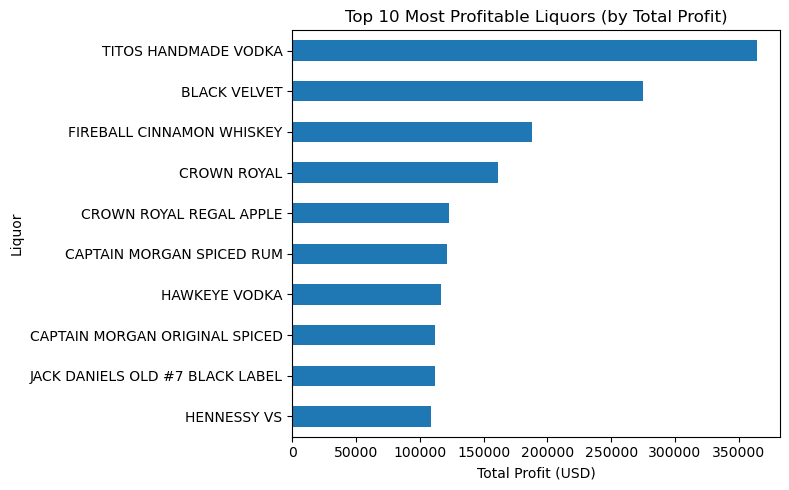

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("iowa.csv")

# CLean data
for col in ["State Bottle Retail", "State Bottle Cost", "Bottles Sold"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace("$", "", regex=False)
            .str.replace(",", "", regex=False)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Define profit metrics
df["profit_per_unit"] = df["State Bottle Retail"] - df["State Bottle Cost"]
df["total_profit"] = df["profit_per_unit"] * df["Bottles Sold"]


group_key = "Item Description" if "Item Description" in df.columns else "Item Number"

# Group and aggregate
grouped = (
    df.groupby(group_key, dropna=True)
      .agg(
          bottles_sold=("Bottles Sold", "sum"),
          avg_profit_per_unit=("profit_per_unit", "mean"),
          total_profit=("total_profit", "sum")
      )
      .sort_values("total_profit", ascending=False)
)

# Display top liquors by total profit
top_n = 10
top = grouped.head(top_n)
display(top.style.format({
    "bottles_sold": "{:,.0f}",
    "avg_profit_per_unit": "${:,.2f}",
    "total_profit": "${:,.0f}"
}))

# Visualization
plt.figure(figsize=(8, 5))
top["total_profit"].sort_values().plot(kind="barh")
plt.xlabel("Total Profit (USD)")
plt.ylabel("Liquor")
plt.title(f"Top {top_n} Most Profitable Liquors (by Total Profit)")
plt.tight_layout()
plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

When I try to subtract the two vectors, I receive a ValueError: operands could not be broadcast together with shapes (3,) (2,). When I try x.reshape(-1,1)-y.reshape(-1,1), I get ValueError: operands could not be broadcast together with shapes (3,1) (2,1). When I try x.reshape(1,-1)-y.reshape(1,-1), I get ValueError: operands could not be broadcast together with shapes (1,3) (1,2). However, reshapin to a column and a row does work: x.reshape(-1,1) - y.reshape(1,-1) broadcasts to shape (len(x), len(y)), producing the full pairwise (outer) difference matrix where entry (i,j) equals x[i] - y[j].

In [18]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [19]:

x.reshape(-1,1)-y.reshape(-1,1)

ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

In [20]:

x.reshape(1,-1)-y.reshape(1,-1)

ValueError: operands could not be broadcast together with shapes (1,3) (1,2) 

In [21]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [ ]:
# Column - Row
res1 = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        res1[i,j] = x[i] - y[j]

res1


array([[-1., -4.],
       [ 1., -2.],
       [ 3.,  0.]])

In [ ]:
# Row - Column
res2 = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        res2[i,j] = y[i] - x[j]

res2

array([[ 1., -1., -3.],
       [ 4.,  2.,  0.]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [4]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?